> Họ và tên: Phùng Dũng Quân\
> MSSV: 22280073

# Thư viện

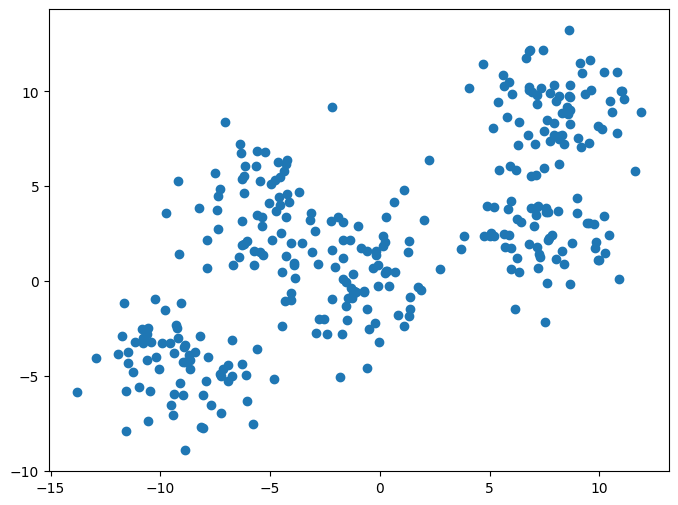

In [11]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from numpy import random
from pandas import DataFrame
from sklearn.cluster import KMeans

random.seed(234)
x, _ = make_blobs(n_samples=330, centers=5, cluster_std=1.84)
plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1])
plt.show()

In [12]:
gm = GaussianMixture(n_components=5).fit(x)
centers = gm.means_
print(centers)

[[-5.55836831  3.87299888]
 [ 7.28418475  2.56387124]
 [-0.90246061  0.16230294]
 [-9.18288987 -4.47852917]
 [ 8.11454324  9.24741885]]


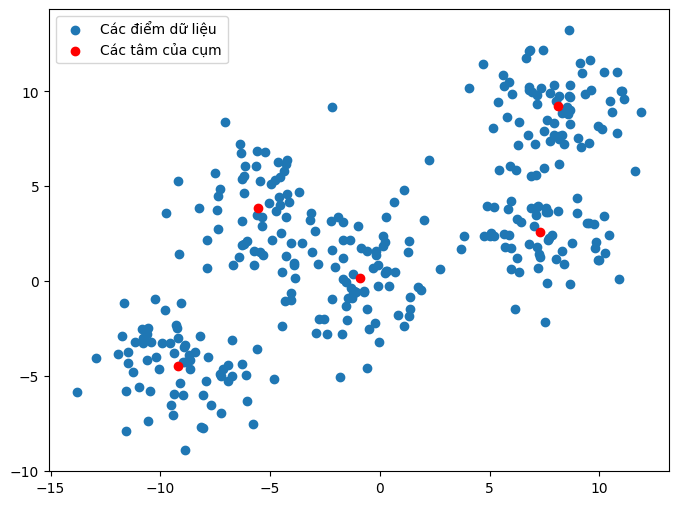

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1], label="Các điểm dữ liệu")
plt.scatter(centers[:,0], centers[:,1], c='r', label="Các tâm của cụm")
plt.legend()
plt.show()

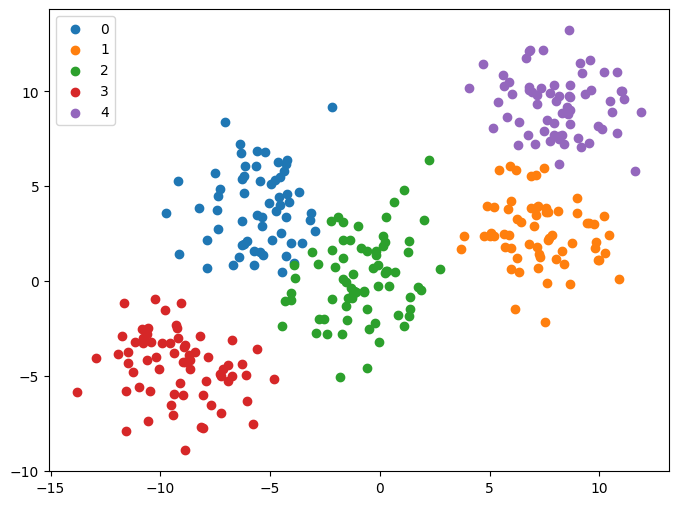

In [14]:
pred = gm.predict(x)

df = DataFrame({'x': x[:,0], 'y': x[:,1], 'label': pred})
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(8, 6))
for name, group in groups:
    ax.scatter(group.x, group.y, label=name)

ax.legend()
plt.show()

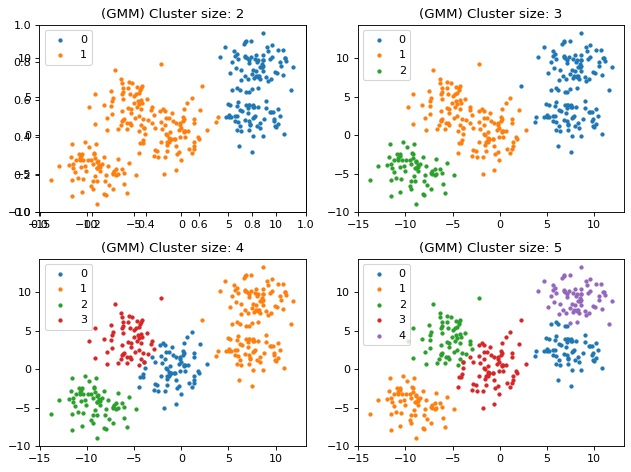

In [15]:
f = plt.figure(figsize=(8, 6), dpi=80)
f.add_subplot(2, 2, 1)

for i in range(2, 6):
    gm = GaussianMixture(n_components=i).fit(x)
    pred = gm.predict(x)
    df = DataFrame({'x': x[:,0], 'y': x[:,1], 'label': pred})
    groups = df.groupby('label')
    f.add_subplot(2, 2, i-1)
    for name, group in groups:
        plt.scatter(group.x, group.y, label=name, s=8)
    plt.title("(GMM) Cluster size: " + str(i))
    plt.legend()

plt.tight_layout()
plt.show()

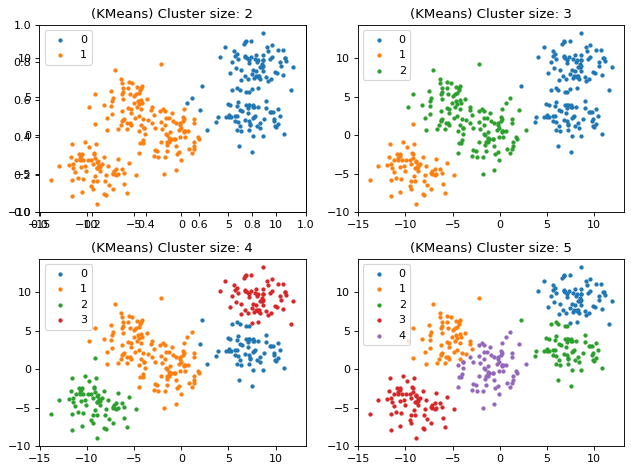

In [16]:
f = plt.figure(figsize=(8, 6), dpi=80)
f.add_subplot(2, 2, 1)

for i in range(2, 6):
    km = KMeans(n_clusters=i).fit(x)
    pred = km.predict(x)
    df = DataFrame({'x': x[:,0], 'y': x[:,1], 'label': pred})
    groups = df.groupby('label')
    f.add_subplot(2, 2, i-1)
    for name, group in groups:
        plt.scatter(group.x, group.y, label=name, s=8)
    plt.title("(KMeans) Cluster size: " + str(i))
    plt.legend()

plt.tight_layout()
plt.show()

# Thuật toán tự viết

In [53]:
import numpy as np

In [85]:
class Mahalanobis:
    def __init__(self, x, n_clusters):
        self.x = x
        self.n_clusters = n_clusters

    def initial_clusters(self):
        random.seed(42)
        initial_clusters = random.choice(len(self.x), self.n_clusters, replace=False)
        return self.x[initial_clusters]
    
    def mahalanobis_distance(self):
        distance_matrix = []
        for i in range(len(x)):
            distances = []
            for j in range(len(self.initial_clusters())):
                diff = x[i] - self.initial_clusters()[j]
                cov_inv = np.linalg.inv(np.cov(x.T))
                distance = np.sqrt(np.dot(np.dot(diff, cov_inv), diff.T))
                distances.append(distance)
            distance_matrix.append(distances)
        return distance_matrix
    
    def labels(self):
        distance_matrix = self.mahalanobis_distance()
        labels = np.argmin(distance_matrix, axis=1)
        return labels
    
    def assign_clusters(self):
        distance_matrix = self.mahalanobis_distance()
        clusters = np.argmin(distance_matrix, axis=1)
        return clusters
    
mahalanobis = Mahalanobis(x, 5)
initial_clusters = mahalanobis.initial_clusters()
clusters = mahalanobis.assign_clusters()
print(clusters)

[3 1 1 0 0 2 0 3 3 0 0 1 1 3 3 1 3 1 3 3 2 2 2 1 3 2 3 1 3 2 1 2 3 2 0 3 3
 3 2 2 2 1 0 3 3 3 3 2 0 2 3 3 3 2 0 1 3 2 3 2 3 2 2 1 1 0 3 1 3 0 0 1 3 1
 3 1 3 1 3 1 1 3 0 3 1 3 2 0 1 3 2 0 3 1 4 1 2 0 3 3 3 0 1 3 0 1 0 0 3 1 2
 1 3 3 0 3 3 1 2 1 3 2 0 0 1 3 1 3 2 0 2 3 3 3 2 2 1 3 1 2 1 2 3 3 0 1 0 3
 3 2 0 2 2 3 2 1 3 3 3 2 0 1 1 2 1 0 0 2 2 3 3 0 3 3 3 0 3 3 0 3 1 1 3 1 1
 1 3 3 3 4 3 2 3 2 3 0 3 3 2 0 3 3 3 0 3 1 3 2 3 2 1 3 1 1 0 3 1 2 3 2 0 2
 2 1 3 0 2 3 2 2 3 3 2 1 3 2 2 3 2 3 3 2 3 0 0 3 1 0 0 3 0 1 1 3 3 0 3 2 2
 0 2 2 3 2 0 2 3 3 2 3 3 3 1 1 3 3 2 1 3 3 3 1 1 0 2 2 0 2 2 1 0 1 2 3 3 0
 3 3 3 4 2 3 3 3 0 3 0 3 2 3 3 3 1 3 0 0 0 3 3 1 2 1 3 3 0 2 3 2 3 3]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

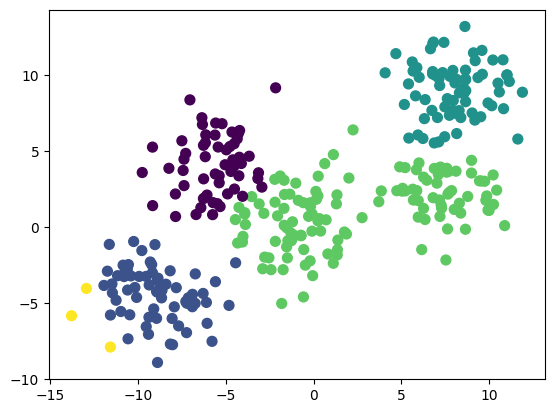

In [86]:
# Plot k-means clustering
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(clusters[:, 0], clusters[:, 1], c='red', s=200, alpha=0.5, marker='X')
plt.title('K-means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
# Plot Mahalanobis clustering
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=mahalanobis_labels, cmap='viridis', s=50)
plt.scatter(initial_clusters[:, 0], initial_clusters[:, 1], c='red', s=200, alpha=0.5, marker='X')
plt.title('Mahalanobis Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

## Expectation-Maximization

Centers:
 [[ 7.28214676  2.4479691 ]
 [ 9.00671963  1.42094897]
 [ 8.34479345  7.59598262]
 [-4.94163327 -0.20353834]
 [ 7.77642834  9.99691022]]
Covariances:
 [[[ 2.84908773 -0.31413874]
  [-0.31413874  1.46515447]]

 [[ 2.60229645  3.53415359]
  [ 3.53415359  6.00972681]]

 [[ 2.47050071  1.45048829]
  [ 1.45048829  1.65752508]]

 [[16.31342164  6.46505441]
  [ 6.46505441 15.3704108 ]]

 [[ 2.91520826 -0.06333873]
  [-0.06333873  1.68950495]]]
Weights:
 [0.14806197 0.02343437 0.08176742 0.61361962 0.13311662]


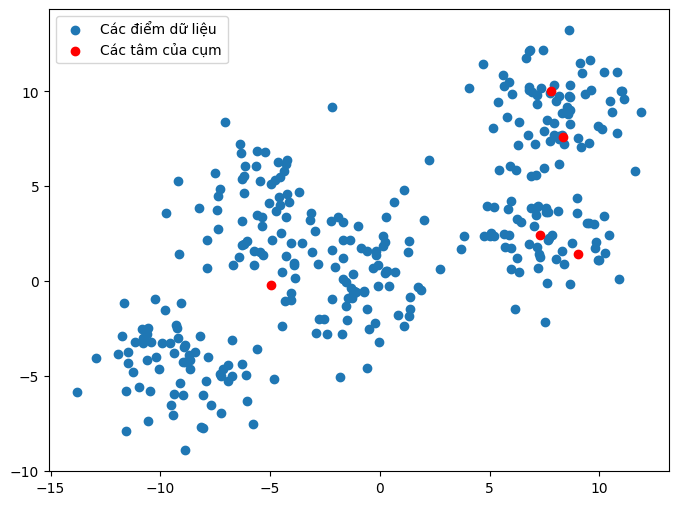

In [18]:
from scipy.stats import multivariate_normal

def expectation_maximization(x, k, max_iter=100):
    n_samples, n_features = x.shape
    # Khởi tạo các trọng số, trung tâm và hiệp phương sai
    weights = np.ones(k) / k
    centers = x[np.random.choice(n_samples, k, replace=False)]
    covariances = np.array([np.eye(n_features)] * k)
    
    for _ in range(max_iter):
        # Bước E: Tính xác suất cho mỗi điểm dữ liệu thuộc về mỗi cụm
        responsibilities = np.zeros((n_samples, k))
        for i in range(k):
            responsibilities[:, i] = weights[i] * multivariate_normal.pdf(x, mean=centers[i], cov=covariances[i])
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)
        
        # Bước M: Cập nhật trọng số, trung tâm và hiệp phương sai
        weights = responsibilities.mean(axis=0)
        for i in range(k):
            centers[i] = np.dot(responsibilities[:, i], x) / responsibilities[:, i].sum()
            diff = x - centers[i]
            covariances[i] = np.dot(responsibilities[:, i] * diff.T, diff) / responsibilities[:, i].sum()
    
    return centers, covariances, weights

centers, covariances, weights = expectation_maximization(x, k=5)
print("Centers:\n", centers)
print("Covariances:\n", covariances)
print("Weights:\n", weights)
# Vẽ các cụm
plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1], label="Các điểm dữ liệu")
plt.scatter(centers[:,0], centers[:,1], c='r', label="Các tâm của cụm")
plt.legend()
plt.show()

## Mahalanobis k-means

Centers:
 [[-9.11884366 -4.41040797]
 [ 7.26048112  2.56887887]
 [ 8.03517044  9.16131735]
 [-5.36745278  3.85136568]
 [-0.94829035  0.06472201]]
Weights:
 [0.20565064 0.18923013 0.20863787 0.18658975 0.20989161]


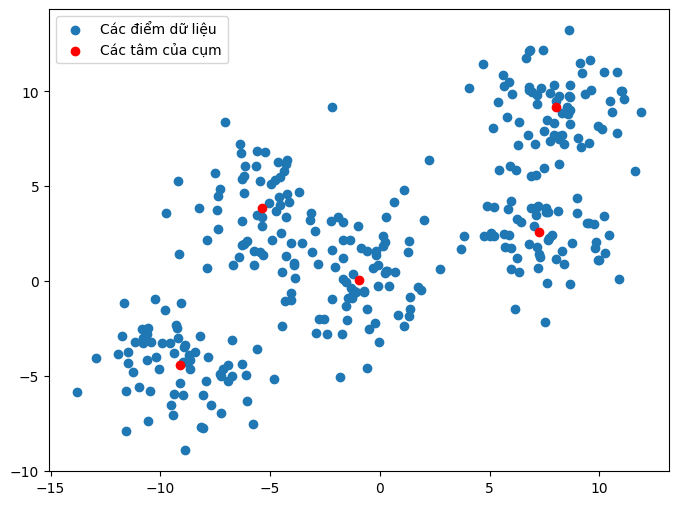

In [19]:
def mahalanobis_kmeans(x, k, max_iter=100):
    n_samples, n_features = x.shape
    # Khởi tạo các trọng số, trung tâm và hiệp phương sai
    weights = np.ones(k) / k
    centers = x[np.random.choice(n_samples, k, replace=False)]
    
    for _ in range(max_iter):
        # Bước E: Tính xác suất cho mỗi điểm dữ liệu thuộc về mỗi cụm
        distances = np.zeros((n_samples, k))
        for i in range(k):
            diff = x - centers[i]
            distances[:, i] = np.sqrt(np.sum(diff**2, axis=1))
        responsibilities = np.exp(-distances)
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)
        
        # Bước M: Cập nhật trọng số và trung tâm
        weights = responsibilities.mean(axis=0)
        for i in range(k):
            centers[i] = np.dot(responsibilities[:, i], x) / responsibilities[:, i].sum()
    
    return centers, weights
centers, weights = mahalanobis_kmeans(x, k=5)
print("Centers:\n", centers)
print("Weights:\n", weights)
# Vẽ các cụm
plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1], label="Các điểm dữ liệu")
plt.scatter(centers[:,0], centers[:,1], c='r', label="Các tâm của cụm")
plt.legend()
plt.show()